<a href="https://colab.research.google.com/github/LeoVinacur/Python/blob/main/Copia_de_Clase23_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/asalber/manual-python/master/datos/colesteroles.csv', sep=';', decimal=',')

In [3]:
df

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
2,Javier García Sánchez,24,H,NaN,1.81,191.0
3,Carmen López Pinzón,35,M,65.0,1.70,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,NaN
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0


# Analysis

Informacion general del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      14 non-null     object 
 1   edad        14 non-null     int64  
 2   sexo        14 non-null     object 
 3   peso        13 non-null     float64
 4   altura      14 non-null     float64
 5   colesterol  13 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 800.0+ bytes


Estadistica generales del dataset
* El promedio de edad es de 38 años. 
* El rango de los niveles de colesterol van desde 148 a los 280
* La mediana de altura es 1.76 mts

In [ ]:
df.describe()

,edad,peso,altura,colesterol
count,14.000000,13.000000,14.000000,13.000000
mean,38.214286,70.923077,1.768571,220.230769
std,15.621379,16.126901,0.115016,39.847948
min,18.000000,51.000000,1.580000,148.000000
25%,24.750000,61.000000,1.705000,194.000000
50%,35.000000,65.000000,1.755000,210.000000
75%,49.750000,78.000000,1.840000,249.000000
max,68.000000,109.000000,1.980000,280.000000


Seleccionar columnas y filas con iloc

Por nombre de las columnas

In [5]:
df.loc[:,["edad"]]

,edad
0,18
1,32
2,24
3,35
4,46
5,68
6,51
7,22
8,35
9,46


In [ ]:
df.loc[0:5,["edad","peso"]]

,edad,peso
0,18,85.0
1,32,65.0
2,24,NaN
3,35,65.0
4,46,51.0
5,68,66.0


Por nro de columna

In [ ]:
df.iloc[5,1:]

edad             68
sexo              H
peso           66.0
altura         1.74
colesterol    249.0
Name: 5, dtype: object

In [ ]:
df.iloc[:,1:]

,edad,sexo,peso,altura,colesterol
0,18,H,85.0,1.79,182.0
1,32,M,65.0,1.73,232.0
2,24,H,NaN,1.81,191.0
3,35,M,65.0,1.70,200.0
4,46,M,51.0,1.58,148.0
5,68,H,66.0,1.74,249.0
6,51,H,62.0,1.72,276.0
7,22,M,60.0,1.66,NaN
8,35,H,90.0,1.94,241.0
9,46,H,75.0,1.85,280.0


Sumar una columna

In [ ]:
df.edad.sum()

535

In [ ]:
# Filtramos primero por genero y luego sumamos
df[df.sexo == 'M'].edad.sum()

208

Contar nulos

In [ ]:
df.isnull().sum()

nombre        0
edad          0
sexo          0
peso          1
altura        0
colesterol    1
dtype: int64

Rellenar los datos nulos

In [ ]:
df.fillna("Sin datos")

,nombre,edad,sexo,peso,altura,colesterol
0,José Luis Martínez Izquierdo,18,H,85.0,1.79,182.0
1,Rosa Díaz Díaz,32,M,65.0,1.73,232.0
2,Javier García Sánchez,24,H,Sin datos,1.81,191.0
3,Carmen López Pinzón,35,M,65.0,1.70,200.0
4,Marisa López Collado,46,M,51.0,1.58,148.0
5,Antonio Ruiz Cruz,68,H,66.0,1.74,249.0
6,Antonio Fernández Ocaña,51,H,62.0,1.72,276.0
7,Pilar Martín González,22,M,60.0,1.66,Sin datos
8,Pedro Gálvez Tenorio,35,H,90.0,1.94,241.0
9,Santiago Reillo Manzano,46,H,75.0,1.85,280.0


Cantidad de valores por clase

In [ ]:
df.sexo.value_counts()

H    8
M    6
Name: sexo, dtype: int64

# Correlacion

Correlacion entre variables



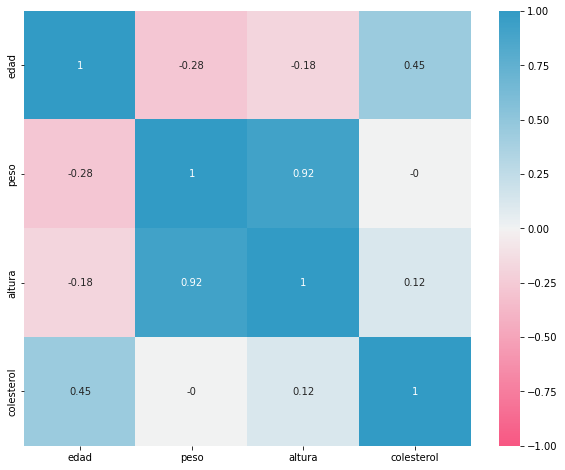

In [8]:
plt.figure(figsize = [10,8])
sns.heatmap(round(df.corr(),2), cmap=sns.diverging_palette(0, 230, 90, 60, as_cmap=True),annot=True, vmin=-1, vmax=1,);

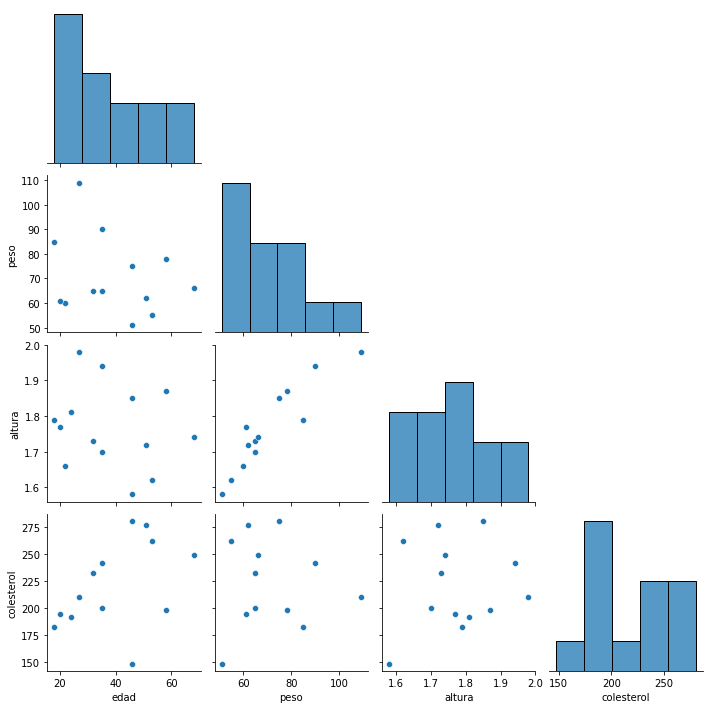

In [ ]:
sns.pairplot(df, corner=True)

# Graficos
Mas info ---> `https://www.data-to-viz.com/`

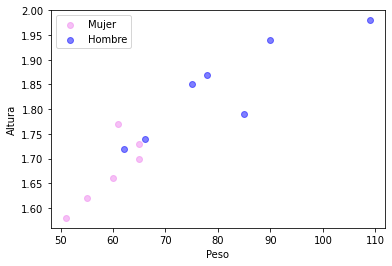

In [7]:
plt.scatter(df[df['sexo'] == 'M'].peso, df[df['sexo'] == 'M'].altura, c="violet", alpha=0.5)
plt.scatter(df[df['sexo'] == 'H'].peso, df[df['sexo'] == 'H'].altura, c="blue", alpha=0.5)
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.legend(["Mujer","Hombre"])

Grafico de torta

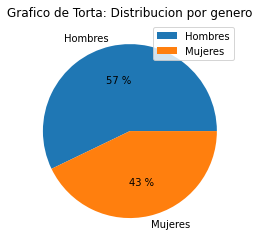

In [ ]:
plt.pie(df.sexo.value_counts(), labels=["Hombres", "Mujeres"], autopct="%1.f %%")
plt.legend(["Hombres", "Mujeres"])
plt.title("Grafico de Torta: Distribucion por genero")
plt.show();

Grafico de Histograma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


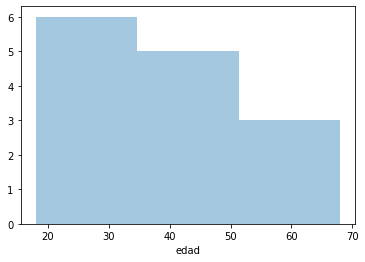

In [ ]:
sns.distplot( a=df.edad, hist=True, kde=False, rug=False )

# ACTIVIDAD
* Cual es la altura de Antonio Fernández Ocaña?
* Transformar la columna altura a CM (multiplicar por 100)
* Scatter plot de la distribucion edad y colesterol
* Agregar la columna "IMC" y calcularlo de la siguiente manera (peso(kg) / altura(m) ^ 2) 
* Renombrar el valor nulo del indice 3 por "Sin datos del peso"


In [6]:
df.groupby

<bound method DataFrame.groupby of                              nombre  edad sexo   peso  altura  colesterol
0      José Luis Martínez Izquierdo    18    H   85.0    1.79       182.0
1                    Rosa Díaz Díaz    32    M   65.0    1.73       232.0
2             Javier García Sánchez    24    H    NaN    1.81       191.0
3               Carmen López Pinzón    35    M   65.0    1.70       200.0
4              Marisa López Collado    46    M   51.0    1.58       148.0
5                 Antonio Ruiz Cruz    68    H   66.0    1.74       249.0
6           Antonio Fernández Ocaña    51    H   62.0    1.72       276.0
7             Pilar Martín González    22    M   60.0    1.66         NaN
8              Pedro Gálvez Tenorio    35    H   90.0    1.94       241.0
9           Santiago Reillo Manzano    46    H   75.0    1.85       280.0
10            Macarena Álvarez Luna    53    M   55.0    1.62       262.0
11       José María de la Guía Sanz    58    H   78.0    1.87       198.0
12 